<a href="https://colab.research.google.com/github/HayatZarine/Consignment-price-predictor/blob/main/Consignment_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

# Load the dataset directly from the URL
url = "https://raw.githubusercontent.com/praj2408/Consignment-Pricing-using-MLOps-DVC/refs/heads/main/consignment_data/Consignment_pricing_raw.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Overview:")
display(data.head())

# Get basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Overview:


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 no

In [6]:
print("\nMissing Values:")
print(data.isnull().sum())




Missing Values:
ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price           

In [7]:
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


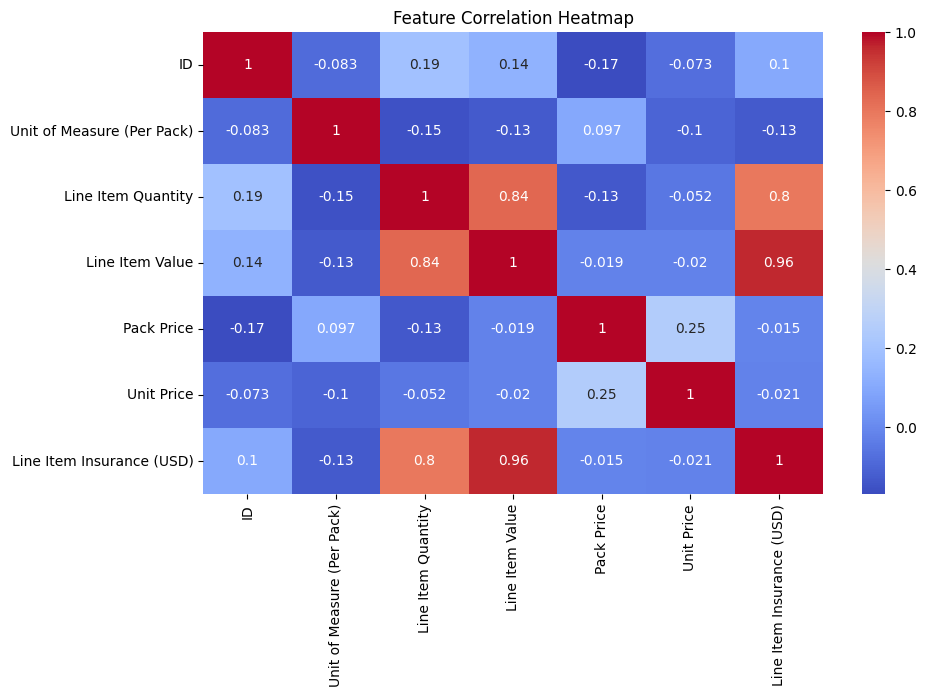

In [8]:
plt.figure(figsize=(10, 6))
# Calculate correlation only for numeric columns
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

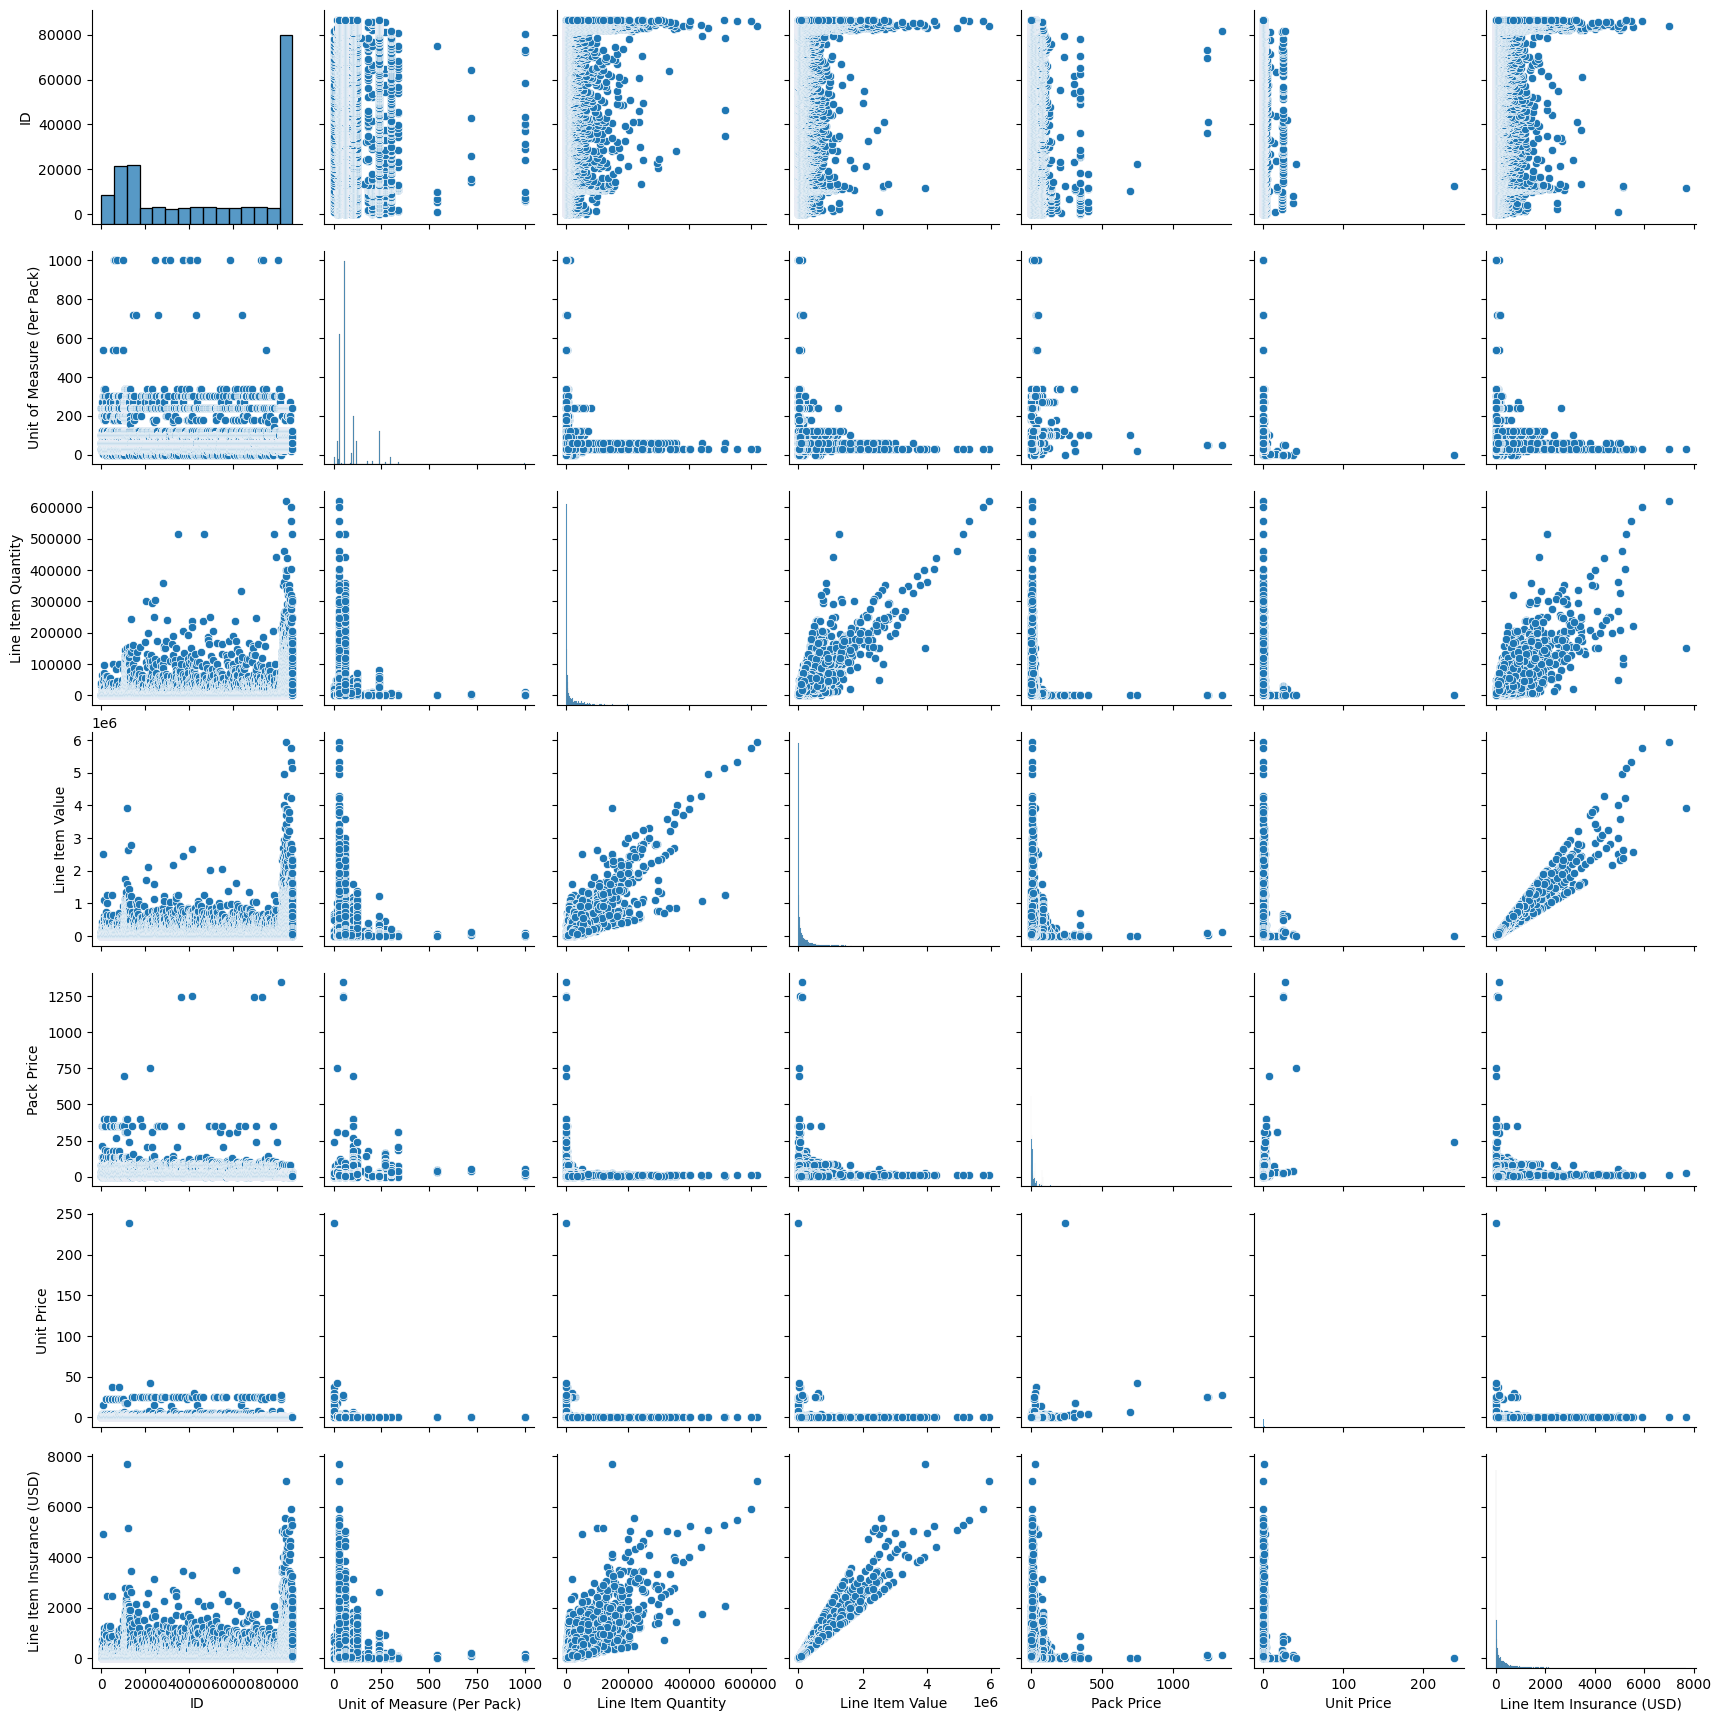

In [9]:
sns.pairplot(data)
plt.show()

In [10]:
# Check the actual column names in your DataFrame
print(data.columns)
X = data.drop(columns=['Pack Price'])  # Use the correct column name 'price'
y = data['Pack Price']



Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr_model = LinearRegression()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtypes)
print(y_train.dtypes)

(8259, 32)
(8259,)
ID                                int64
Project Code                    float64
PQ #                            float64
PO / SO #                       float64
ASN/DN #                        float64
Country                         float64
Managed By                      float64
Fulfill Via                     float64
Vendor INCO Term                float64
Shipment Mode                   float64
PQ First Sent to Client Date    float64
PO Sent to Vendor Date          float64
Scheduled Delivery Date         float64
Delivered to Client Date        float64
Delivery Recorded Date          float64
Product Group                   float64
Sub Classification              float64
Vendor                          float64
Item Description                float64
Molecule/Test Type              float64
Brand                           float64
Dosage                          float64
Dosage Form                     float64
Unit of Measure (Per Pack)        int64
Line Item Quantity   

In [31]:
for column in X_train.columns:
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Impute missing values BEFORE one-hot encoding
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

# One-hot encode categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check for NaN values after alignment and one-hot encoding for X_train
print("NaN values in X_train after alignment:", X_train.isnull().sum().sum())
print("NaN values in X_test after alignment:", X_test.isnull().sum().sum())

print(X_train.isnull().sum())
print(y_train.isnull().sum())
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='median')  # You can use other strategies like 'mean' or 'most_frequent'

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# One-hot encode categorical features (if necessary after imputation)
X_train = pd.get_dummies(pd.DataFrame(X_train))
X_test = pd.get_dummies(pd.DataFrame(X_test))

# Align the train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check for NaN values after imputation and alignment
print("NaN values in X_train after imputation and alignment:", np.isnan(X_train).sum().sum())
print("NaN values in X_test after imputation and alignment:", np.isnan(X_test).sum().sum())

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

NaN values in X_train after alignment: 198216
NaN values in X_test after alignment: 49560
ID                                 0
Project Code                    8259
PQ #                            8259
PO / SO #                       8259
ASN/DN #                        8259
Country                         8259
Managed By                      8259
Fulfill Via                     8259
Vendor INCO Term                8259
Shipment Mode                   8259
PQ First Sent to Client Date    8259
PO Sent to Vendor Date          8259
Scheduled Delivery Date         8259
Delivered to Client Date        8259
Delivery Recorded Date          8259
Product Group                   8259
Sub Classification              8259
Vendor                          8259
Item Description                8259
Molecule/Test Type              8259
Brand                           8259
Dosage                          8259
Dosage Form                     8259
Unit of Measure (Per Pack)         0
Line Item Quantity    

LinearRegression()

In [32]:
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression Model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

In [33]:
print("\nLinear Regression Performance:")
print(f"MAE: {lr_mae}")
print(f"RMSE: {lr_rmse}")
print(f"R² Score: {lr_r2}")


Linear Regression Performance:
MAE: 19.42511602740837
RMSE: 57.10731446688501
R² Score: 0.11248119387542999


In [34]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

In [36]:
print("\nRandom Forest Regression Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R² Score: {rf_r2}")


Random Forest Regression Performance:
MAE: 1.1049029539951598
RMSE: 17.09115725250036
R² Score: 0.9205055096283553
